In [7]:
using FITSIO
using DataFrames 
using CSV
using CairoMakie

import NaNMath as nm
using KernelDensity
using Measurements

In [8]:
using Arya
import LilGuys as lguys


Precompiling Arya
  ✓ Arya
  1 dependency successfully precompiled in 6 seconds. 360 already precompiled.


In [9]:
f = FITS("./data/Sculptor.GAIASOURCE.RUWE.VELS.PROB.fits")
all_stars = DataFrame(f[2])

Row,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,vel,⋯
,Int64,String,Int64,Int64,Float64,Float64,Float32,Float64,Float32,Float64,Float32,Float32,Float32,Float64,Float32,Float64,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Int16,Int16,Int16,Int16,Float32,Float32,Float32,Float32,Int16,Bool,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Int16,Int16,Float32,Int16,Int16,Int16,Float32,Float32,Int16,Int16,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Bool,Int16,Float64,Float32,Float32,Float32,Int16,Float64,Float32,Float32,Float32,Int16,Float64,Float32,Float32,Float32,Int16,Int16,Int16,Int16,Int16,Float32,Float32,Float32,Float32,Float32,Float32,Int16,Float32,Float32,Float32,Float64,Float64,Float64,Float64,Float64,⋯
1,1636042515805110273,Gaia EDR3 5027215376942571648,5027215376942571648,1315875804,2016.0,15.0971,0.144006,-33.7382,0.0701045,0.239482,0.19661,1.21805,0.291164,0.212952,0.155441,-0.198565,0.115376,-0.27021,0.406649,0.351731,-0.452298,0.0784078,-0.303356,0.229227,0.160487,-0.292234,-0.410851,837,0,834,3,0.777159,897.115,0.0,0.0,31,false,1.48448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,20,0.248288,106,32,0,0.032554,38.9382,0,0,1.01874,0.141549,0.573383,0.326039,0.604013,-152.409,10.69,53.5846,11.0598,false,891,563.272,0.643801,874.917,18.8106,94,258.093,4.40218,58.6285,19.3091,96,420.164,4.16154,100.963,18.1893,0,3,0,3,0,1.20414,1.11975,0.498533,0.621222,NaN,NaN,0,NaN,NaN,NaN,287.218,-83.1148,358.416,-36.5642,110.4,⋯
2,1636042515805110273,Gaia EDR3 5027215376942565120,5027215376942565120,838943435,2016.0,15.0933,0.352272,-33.7415,0.177104,0.574169,0.508743,1.1286,0.777579,-0.687659,0.369944,-0.362979,0.288802,-0.24936,0.388346,0.369548,-0.449302,0.110178,-0.29007,0.205628,0.158781,-0.2972,-0.385642,811,0,806,5,-1.02518,814.734,0.0,0.0,31,false,1.63468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,20,0.600805,97,31,1,0.041054,35.9195,0,0,0.974084,0.0960833,0.552518,0.310016,0.603547,-136.016,11.6075,51.6717,11.7918,false,830,163.591,0.964526,169.608,20.153,87,94.0265,3.3244,28.2837,20.4054,89,77.4791,3.56453,21.7361,20.0249,0,1,0,2,0,1.04838,0.380482,0.252449,0.128033,NaN,NaN,0,NaN,NaN,NaN,287.25,-83.1126,358.41,-36.5656,NaN,⋯
3,1636042515

In [10]:
members = all_stars[all_stars.PSAT .> 0.2, :]

Row,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,vel,⋯
,Int64,String,Int64,Int64,Float64,Float64,Float32,Float64,Float32,Float64,Float32,Float32,Float32,Float64,Float32,Float64,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Int16,Int16,Int16,Int16,Float32,Float32,Float32,Float32,Int16,Bool,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Int16,Int16,Float32,Int16,Int16,Int16,Float32,Float32,Int16,Int16,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Float32,Bool,Int16,Float64,Float32,Float32,Float32,Int16,Float64,Float32,Float32,Float32,Int16,Float64,Float32,Float32,Float32,Int16,Int16,Int16,Int16,Int16,Float32,Float32,Float32,Float32,Float32,Float32,Int16,Float32,Float32,Float32,Float64,Float64,Float64,Float64,Float64,⋯
1,1636042515805110273,Gaia EDR3 5027215376942571648,5027215376942571648,1315875804,2016.0,15.0971,0.144006,-33.7382,0.0701045,0.239482,0.19661,1.21805,0.291164,0.212952,0.155441,-0.198565,0.115376,-0.27021,0.406649,0.351731,-0.452298,0.0784078,-0.303356,0.229227,0.160487,-0.292234,-0.410851,837,0,834,3,0.777159,897.115,0.0,0.0,31,false,1.48448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,20,0.248288,106,32,0,0.032554,38.9382,0,0,1.01874,0.141549,0.573383,0.326039,0.604013,-152.409,10.69,53.5846,11.0598,false,891,563.272,0.643801,874.917,18.8106,94,258.093,4.40218,58.6285,19.3091,96,420.164,4.16154,100.963,18.1893,0,3,0,3,0,1.20414,1.11975,0.498533,0.621222,NaN,NaN,0,NaN,NaN,NaN,287.218,-83.1148,358.416,-36.5642,110.4,⋯
2,1636042515805110273,Gaia EDR3 5027215376942565120,5027215376942565120,838943435,2016.0,15.0933,0.352272,-33.7415,0.177104,0.574169,0.508743,1.1286,0.777579,-0.687659,0.369944,-0.362979,0.288802,-0.24936,0.388346,0.369548,-0.449302,0.110178,-0.29007,0.205628,0.158781,-0.2972,-0.385642,811,0,806,5,-1.02518,814.734,0.0,0.0,31,false,1.63468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,20,0.600805,97,31,1,0.041054,35.9195,0,0,0.974084,0.0960833,0.552518,0.310016,0.603547,-136.016,11.6075,51.6717,11.7918,false,830,163.591,0.964526,169.608,20.153,87,94.0265,3.3244,28.2837,20.4054,89,77.4791,3.56453,21.7361,20.0249,0,1,0,2,0,1.04838,0.380482,0.252449,0.128033,NaN,NaN,0,NaN,NaN,NaN,287.25,-83.1126,358.41,-36.5656,NaN,⋯
3,1636042515

In [13]:
r_ell = members.r_ell
r_ell = sort(r_ell)

7162-element Vector{Float64}:
  0.01305794030762636
  0.016208561379833775
  0.01938890390630419
  0.019826265654083353
  0.02248199471280887
  0.02286224677251096
  0.02299762597527969
  0.022998652035626677
  0.026769290113225173
  0.02987574244504885
  0.03194674043769113
  0.033982933422918436
  0.03403192373619207
  ⋮
  6.199288789575813
  6.201055360160296
  6.277801928553974
  6.635061725696126
  9.12132348770962
  9.619968480605904
 11.183082091326064
 11.26936357310933
 11.323284029895696
 14.65294761987855
 14.881747206163825
 14.916628718115934

In [1]:
function gaussian_kernel(x, x0=0, bw=1, w=1; nsd=5)
	dx = x .- x0
	return @. ifelse(abs(dx) > nsd*bw, 0,
		w*1/√(2π) * 1/bw * exp(-dx^2/2bw^2)
	)
end

gaussian_kernel (generic function with 4 methods)

In [2]:
function uniform_kernel(x, x0=0, bw=1, w=1)
	dx = x .- x0
	return @. ifelse(abs(dx) > bw, 0,
		w*1/2bw
	)
end

uniform_kernel (generic function with 4 methods)

In [3]:
import NearestNeighbors as nn

In [4]:
"""
	calc_akde(positions; kernel, bw, N)

Assuming positions are sorted, calculates the adaptive KDE 
"""
function calc_akde(positions; kernel=gaussian_kernel, bw=1, k=5, N=10_000, cutoff=5)
	x = positions[(!).(isnan.(positions))]
	xmin = minimum(x)
	xmax = maximum(x)
	x_sample = LinRange(xmin, xmax, N)

	tree = nn.BallTree(reshape(x, (1, :)))
	hs = last.(nn.knn(tree, reshape(x, (1, :)), k, true)[2]) 
	hs .*= bw / sqrt(k)

	pdf = zeros(N)

	for i in 1:length(x)
		xl = searchsortedlast(x_sample, x[i] - cutoff*hs[i])
		xh = searchsortedfirst(x_sample, x[i] + cutoff*hs[i])

		xl = max(1, xl)
		xh = min(xh, length(x_sample))
		xl = 1
		xh = length(x_sample)

		pdf[xl:xh] .+= 1/hs[i]^2 .* [kernel((x_sample[j] - x[i])/ hs[i]) for j in xl:xh]

	end
		
	dx = (xmax - xmin) / N
	pdf ./= sum(pdf * dx)
	return x_sample, pdf, hs
end

calc_akde

In [5]:
"""
	calc_kde(positions; kernel, bw, N)

Assuming positions are sorted, can calculate the kde
"""
function calc_kde(positions; kernel=gaussian_kernel, bw=1, N=1_000, cutoff=5)
	x = positions[(!).(isnan.(positions))]
	xmin = minimum(x)
	xmax = maximum(x)
	x_sample = LinRange(xmin, xmax, N)


	pdf = zeros(N)

	for i in 1:length(positions)
		xl = searchsortedlast(x_sample, positions[i] - cutoff*bw)
		xh = searchsortedfirst(x_sample, positions[i] + cutoff*bw)

		xl = max(1, xl)
		xh = min(xh, length(x_sample))

		pdf[xl:xh] .+= 1/bw^2* [kernel((x_sample[j] - positions[i])/ bw) for j in xl:xh]

	end
		
	dx = (xmax - xmin) / N
	pdf ./= sum(pdf * dx)
	return x_sample, pdf
end

calc_kde

In [16]:
log_r = log10.(r_ell)

7162-element Vector{Float64}:
 -1.8841253210377078
 -1.7902555300327854
 -1.7124467417670337
 -1.7027590789642337
 -1.64816515865752
 -1.6408810918341799
 -1.6383169935063222
 -1.6382976174886903
 -1.5723631455854583
 -1.5246812932143061
 -1.495573446805733
 -1.4687391353433663
 -1.468113500672072
  ⋮
  0.7923418681305485
  0.7924656085449531
  0.7978076091191924
  0.8218449674422819
  0.960057858252442
  0.9831736490938052
  1.0485615129230785
  1.0518993903592184
  1.053972401165009
  1.165924997132582
  1.1726539229739732
  1.1736706800696666

In [14]:
x, y, hs = calc_akde(r_ell, bw=4, k=500, kernel=gaussian_kernel)

(LinRange{Float64}(0.01305794030762636, 14.916628718115934, 10000), [0.016049315700681972, 0.016741299086839273, 0.017456049500660136, 0.01819393606067987, 0.01895535836070164, 0.019740620887764838, 0.020550074802906198, 0.021383996961402956, 0.02224266828123695, 0.02312635111225456  …  6.5269857125731e-7, 6.525490157265299e-7, 6.523994398856658e-7, 6.522498432703705e-7, 6.521002254171589e-7, 6.519505858634081e-7, 6.518009241473581e-7, 6.516512398081146e-7, 6.51501532385648e-7, 6.513518014207954e-7], [0.04646432794762641, 0.04590072771652248, 0.04533181075004878, 0.045253573102145395, 0.044778501845734855, 0.0447104802894086, 0.04468626292139815, 0.04468607937414336, 0.04401156712933861, 0.043455868042712974  …  0.5407098395046351, 0.604258273775767, 1.046601573157746, 1.1358019012182252, 1.415420164428259, 1.4308546651056022, 1.4405002496457746, 2.036128579998387, 2.0770574942510027, 2.083297288801634])

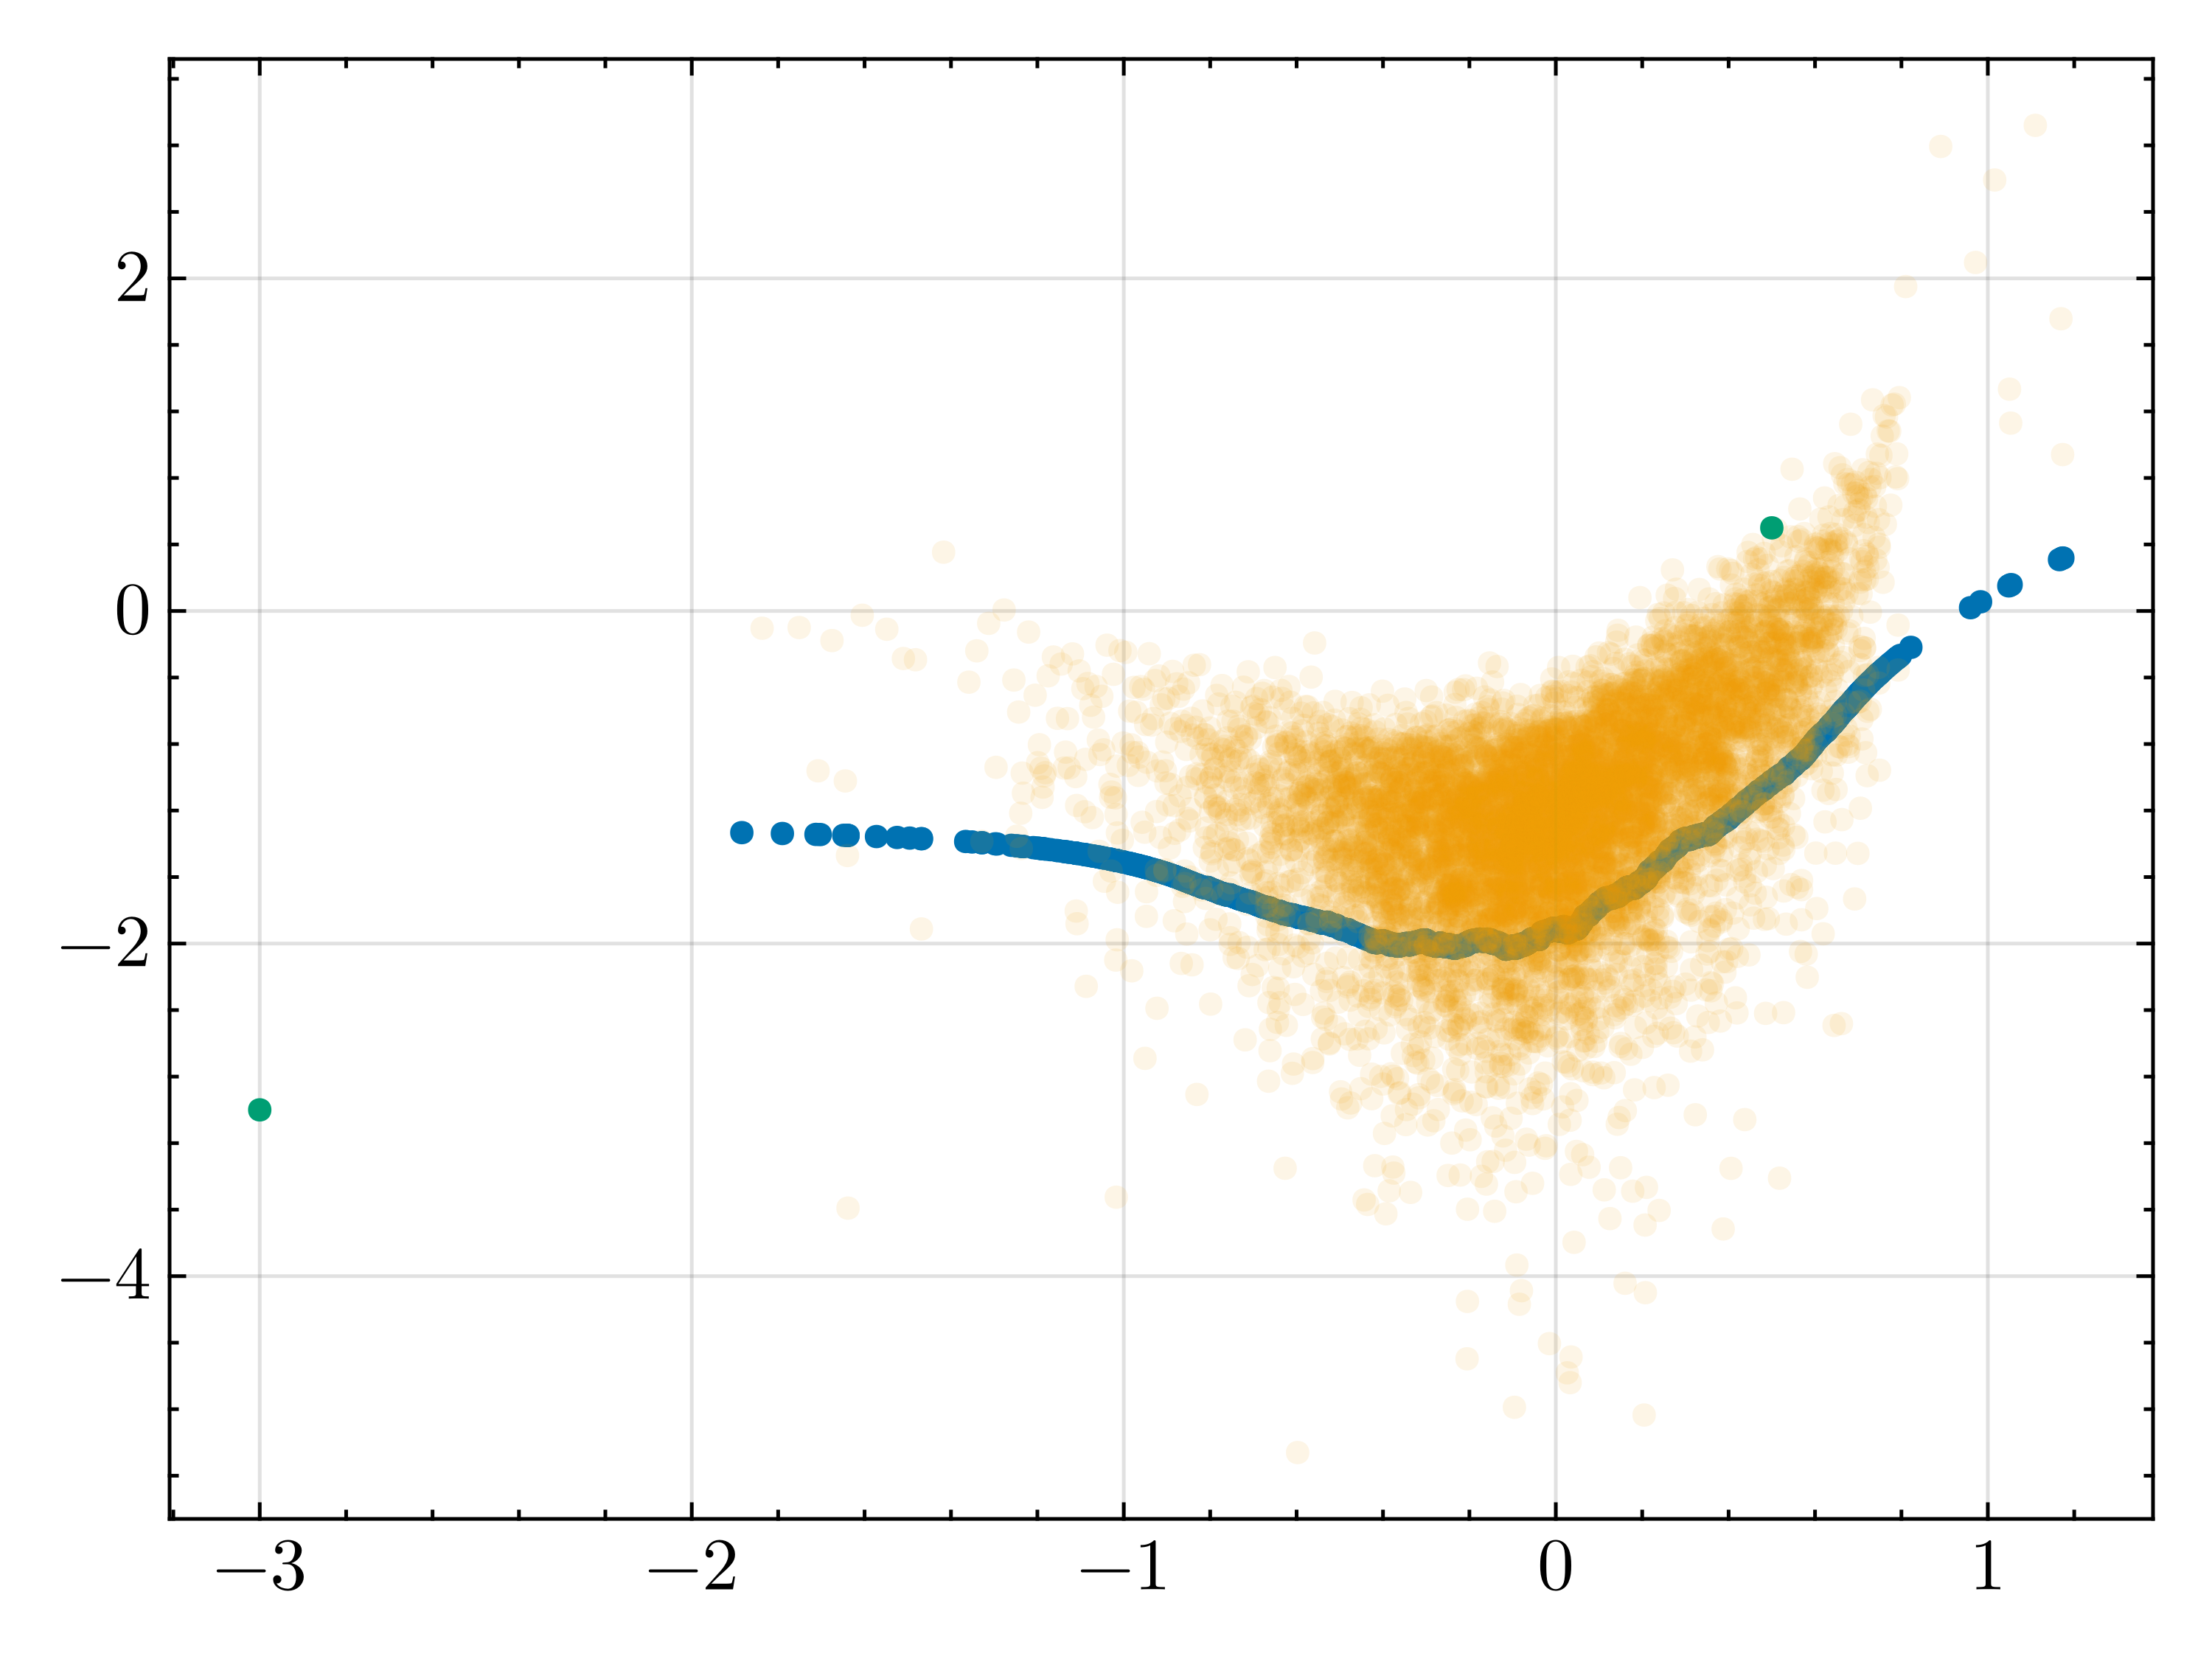

In [18]:
let 
	fig, ax, sc = scatter(log_r, log10.(hs))
	scatter!(lguys.midpoint(log_r), log10.(250*lguys.diff(r_ell)), alpha=0.1)
	plot!([-3, 0.5], [-3, 0.5])
	fig
end

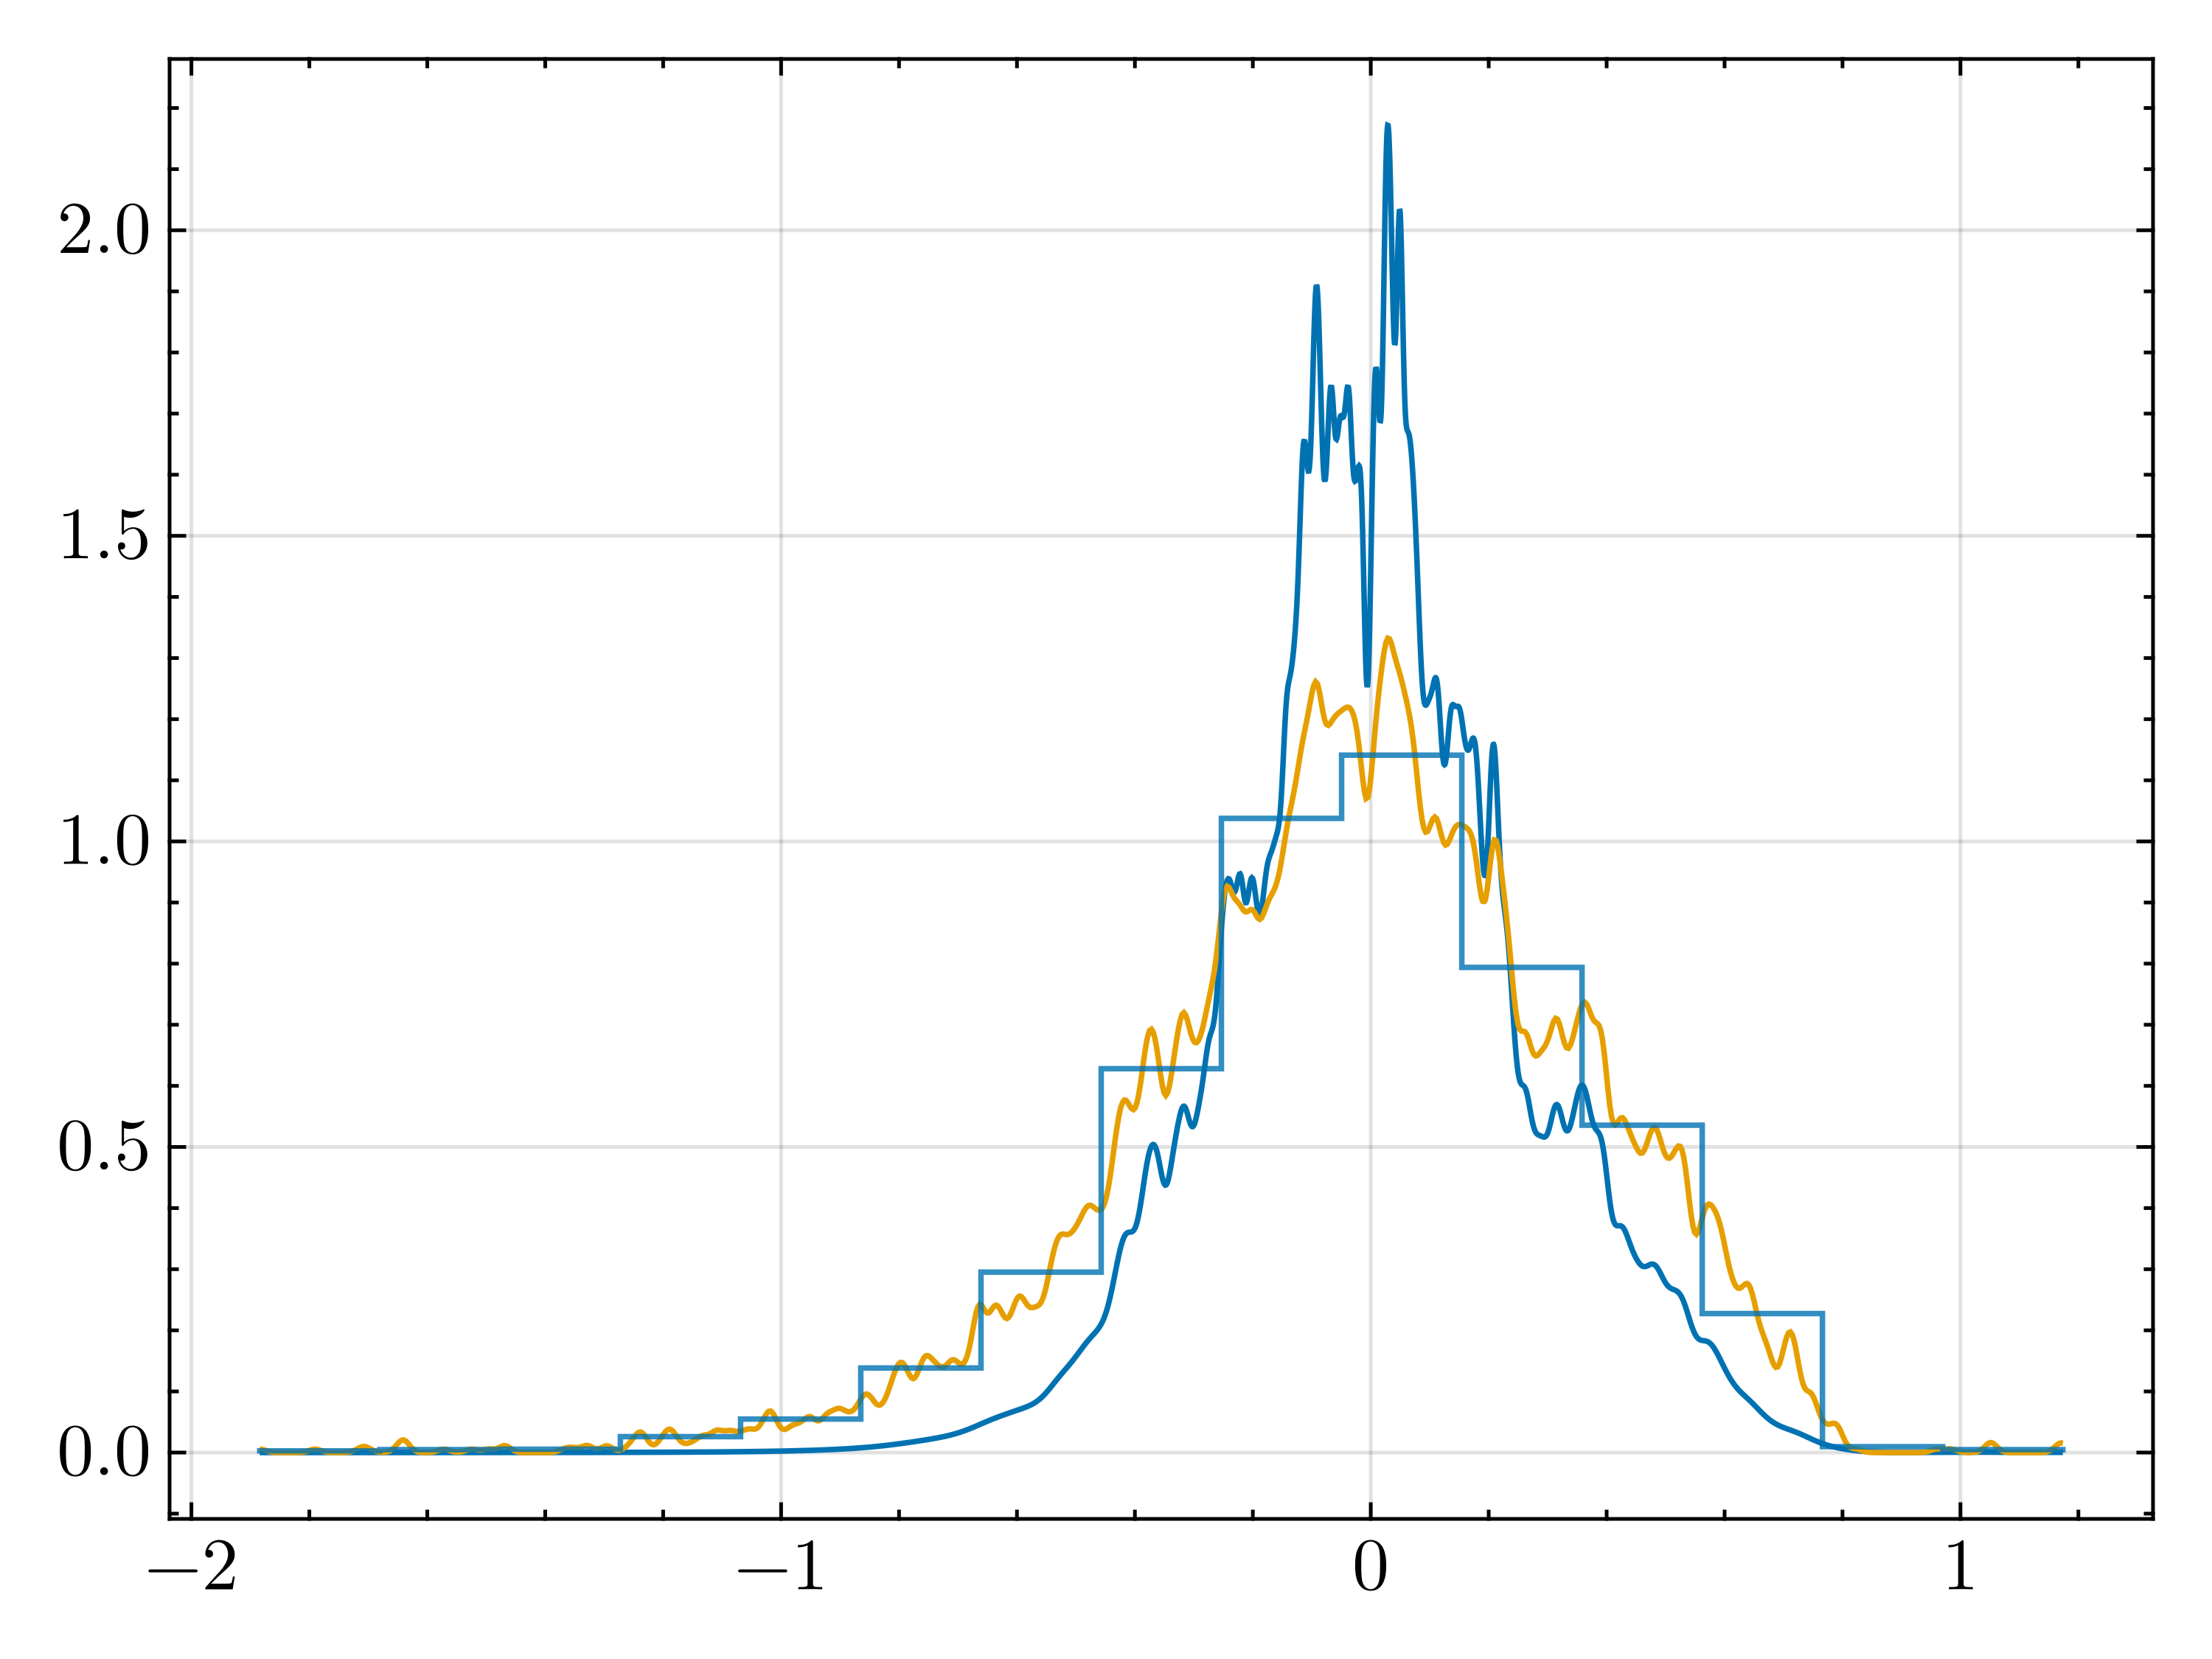

In [19]:
let 
	fig, ax, ls = lines(log10.(x), 5*y .* x .* log(10) ./ lguys.gradient(log10.(x)) /length(r_ell) )
	lines!(calc_kde(sort(log10.(r_ell)), bw=0.01)...)
	stephist!(log10.(r_ell), normalization=:pdf)
	fig
end

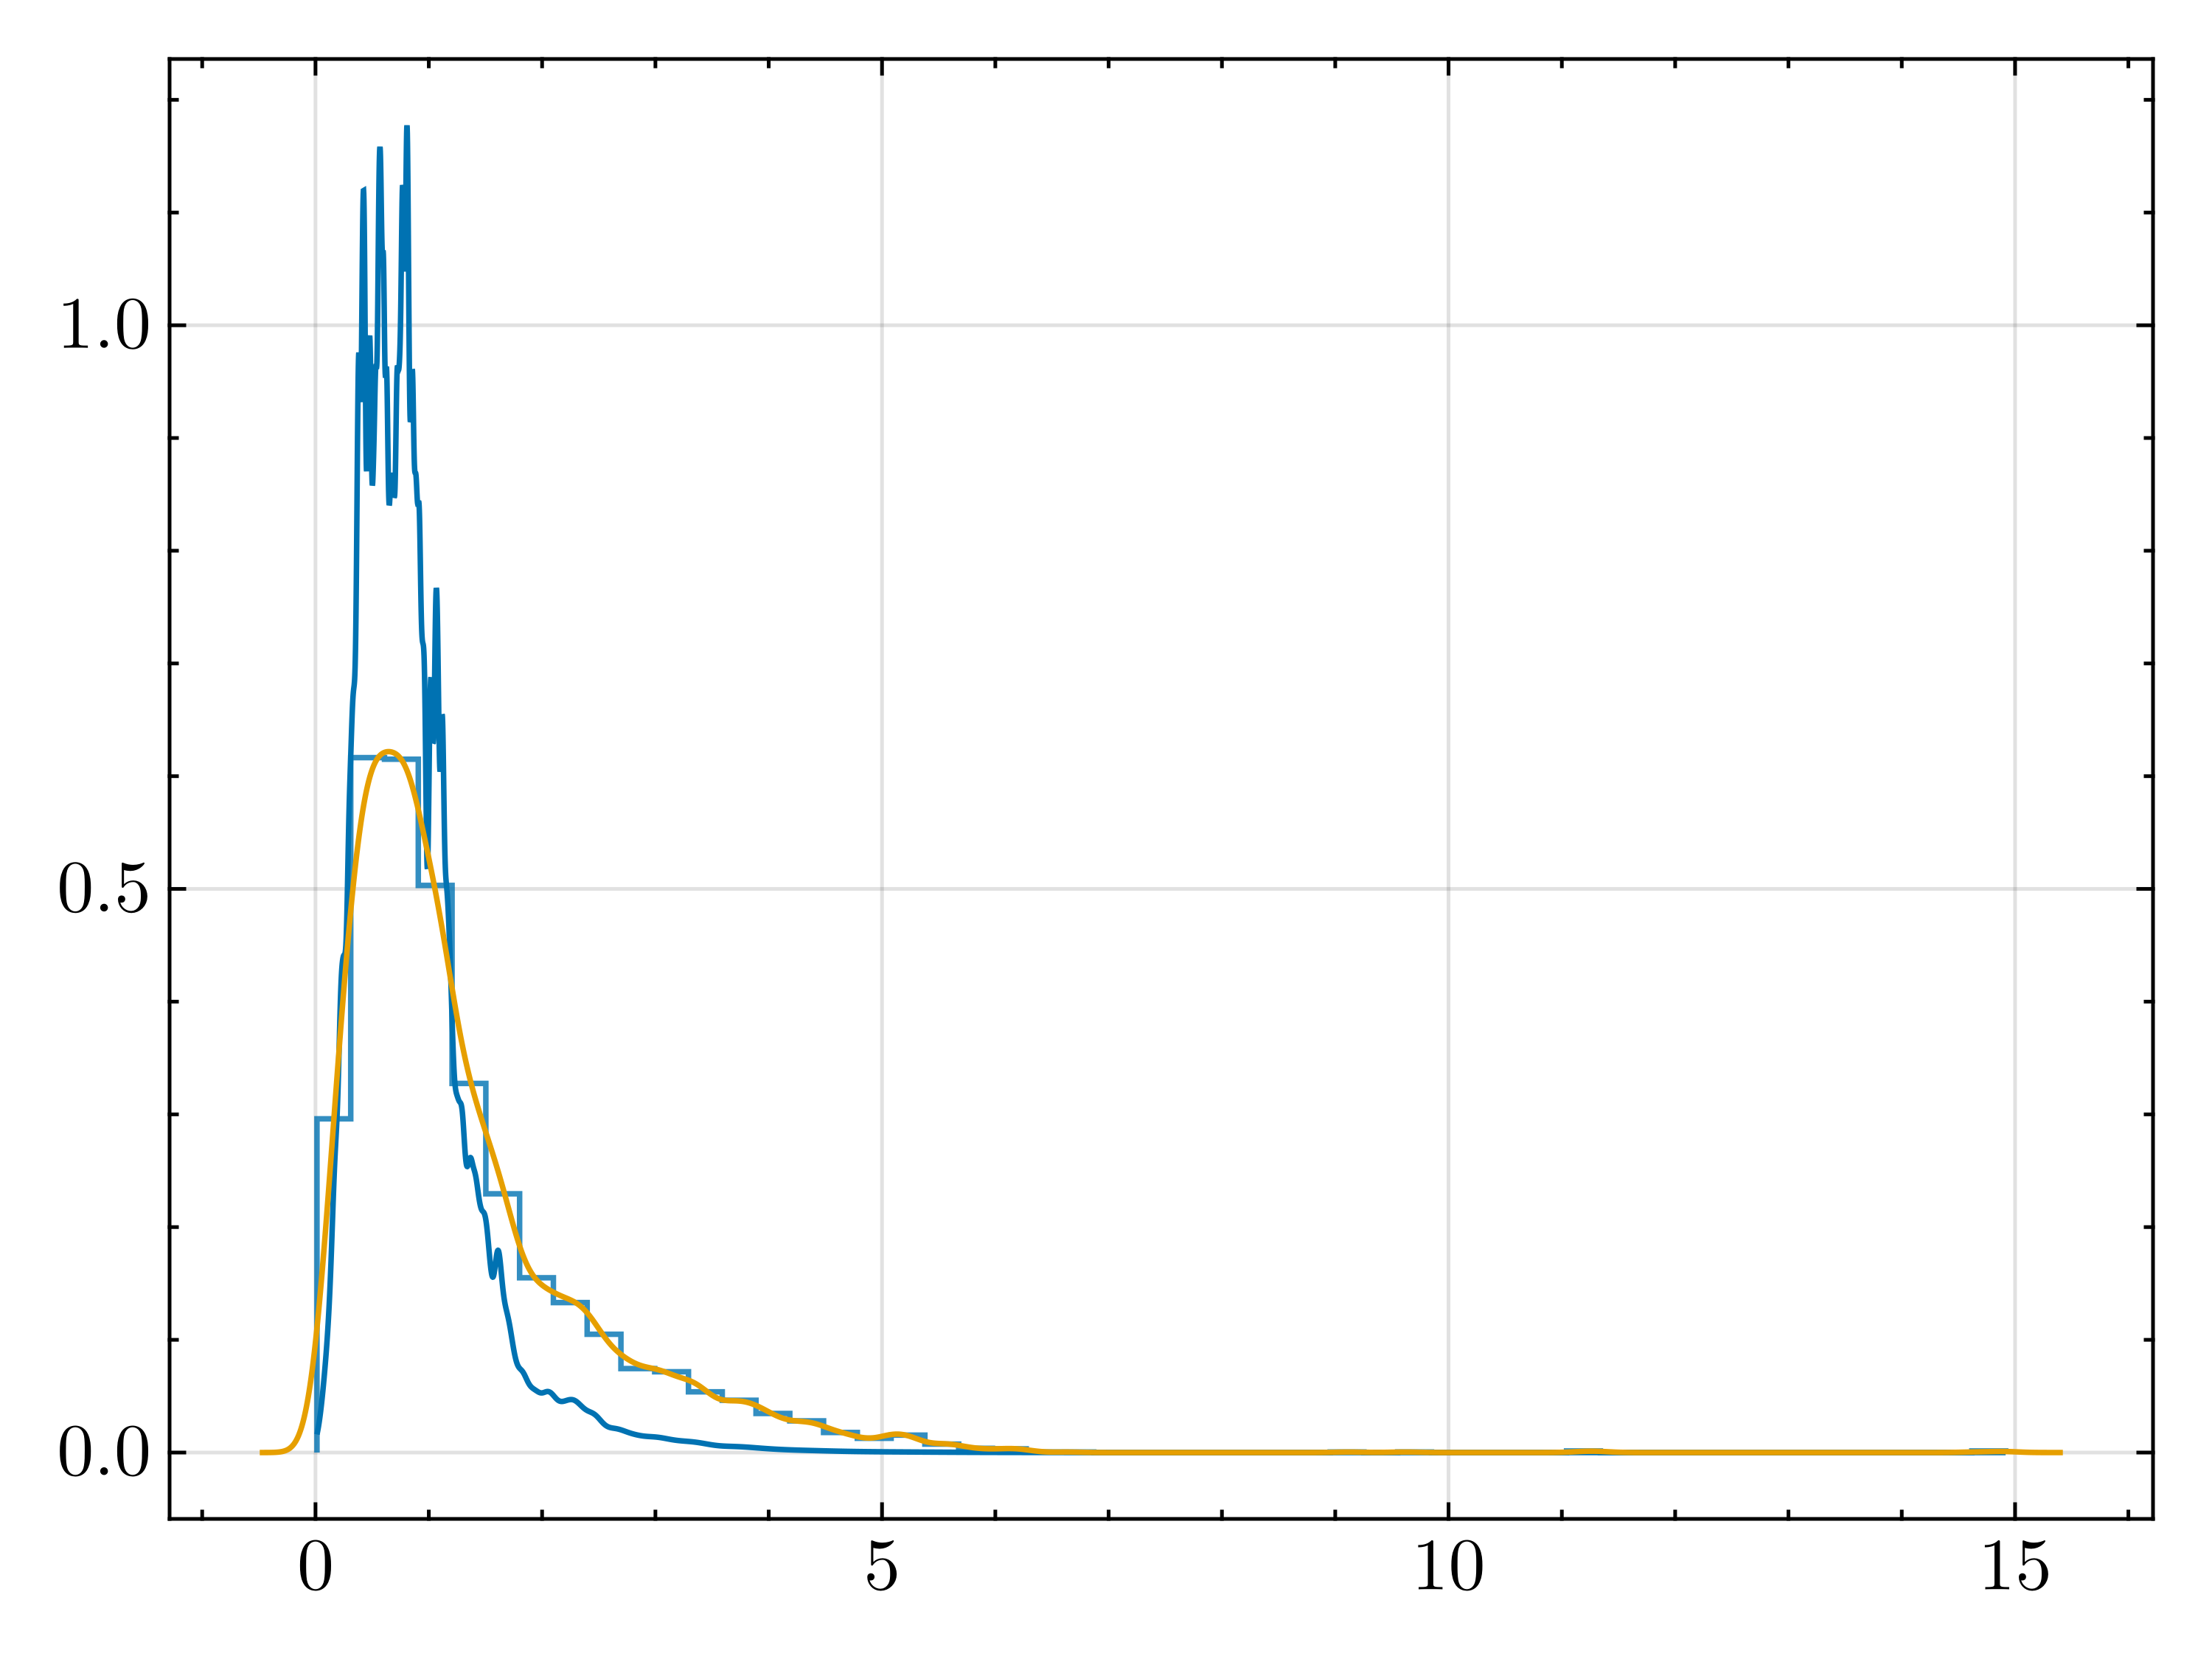

In [20]:
let 
	fig = Figure()
	ax = Axis(fig[1, 1])
	lines!(x, y)
	stephist!(r_ell, bins=50, normalization=:pdf)
	lines!(kde(r_ell))
	fig
end

[1.4142135623730951, 1.4142135623730951, 2.23606797749979, 2.0, 1.4142135623730951, 3.4641016151377544, 4.123105625617661, 5.916079783099616, 6.4031242374328485, 8.48528137423857, 10.535653752852738, 13.416407864998739, 16.3707055437449, 20.97617696340303, 23.53720459187964, 26.720778431774775, 30.495901363953813, 30.805843601498726, 28.0, 24.819347291981714, 23.259406699226016, 20.0, 17.11724276862369, 12.24744871391589, 5.656854249492381, 0.0, 2.23606797749979, 1.4142135623730951]

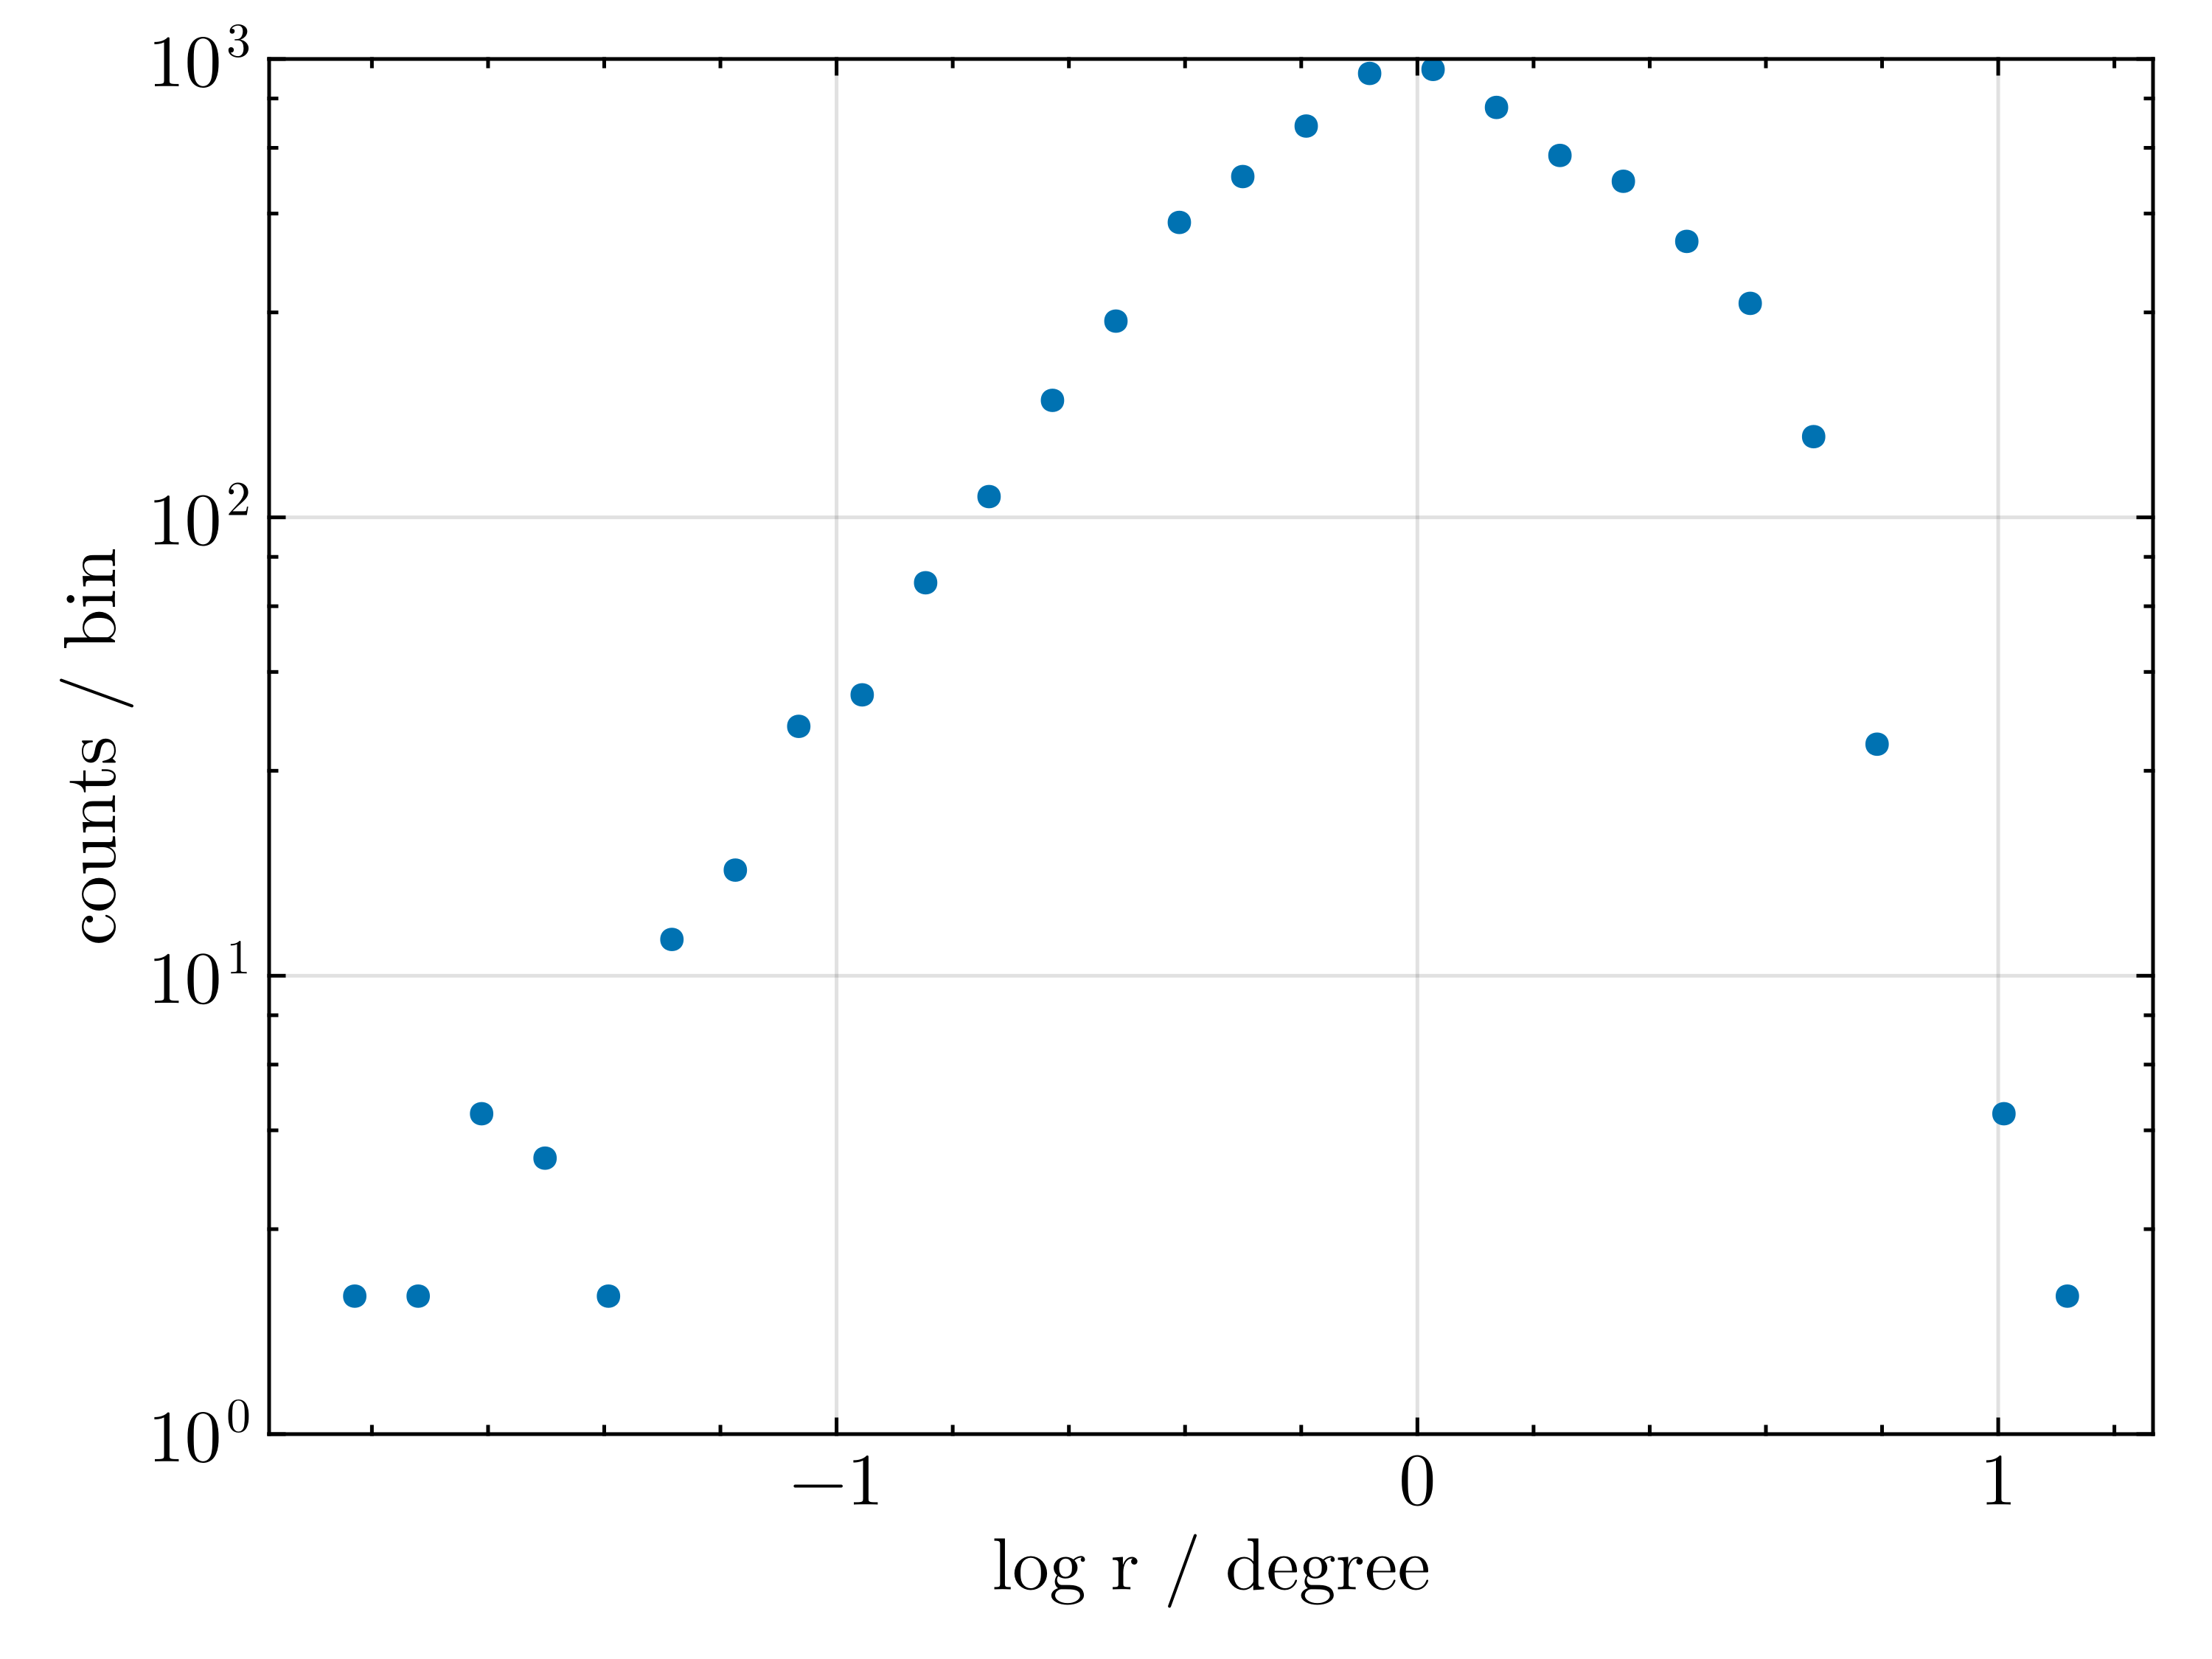

In [24]:
fig = Figure()
ax = Axis(fig[1,1],
    xlabel="log r / degree", ylabel="counts / bin", 
    yscale=log10, 
    limits=(nothing, nothing, 1, 1e3))

#plot!(kde_prof.x, kde_prof.density .* length(r_ell)/9, label="kde")
bins2, ys2 = lguys.calc_histogram(log10.(r_ell), 29)
ys2_err = sqrt.(ys2)
print(ys2_err)

scatter!(ax, lguys.midpoint(bins2), ys2, yerr=ys2_err, label="", lw=2)
ys2_err = ys2_err ./ sum(ys2 .* diff(bins2))

ys2 ./= sum(ys2 .* diff(bins2))


fig

In [25]:
maximum(r_ell)

14.916628718115934

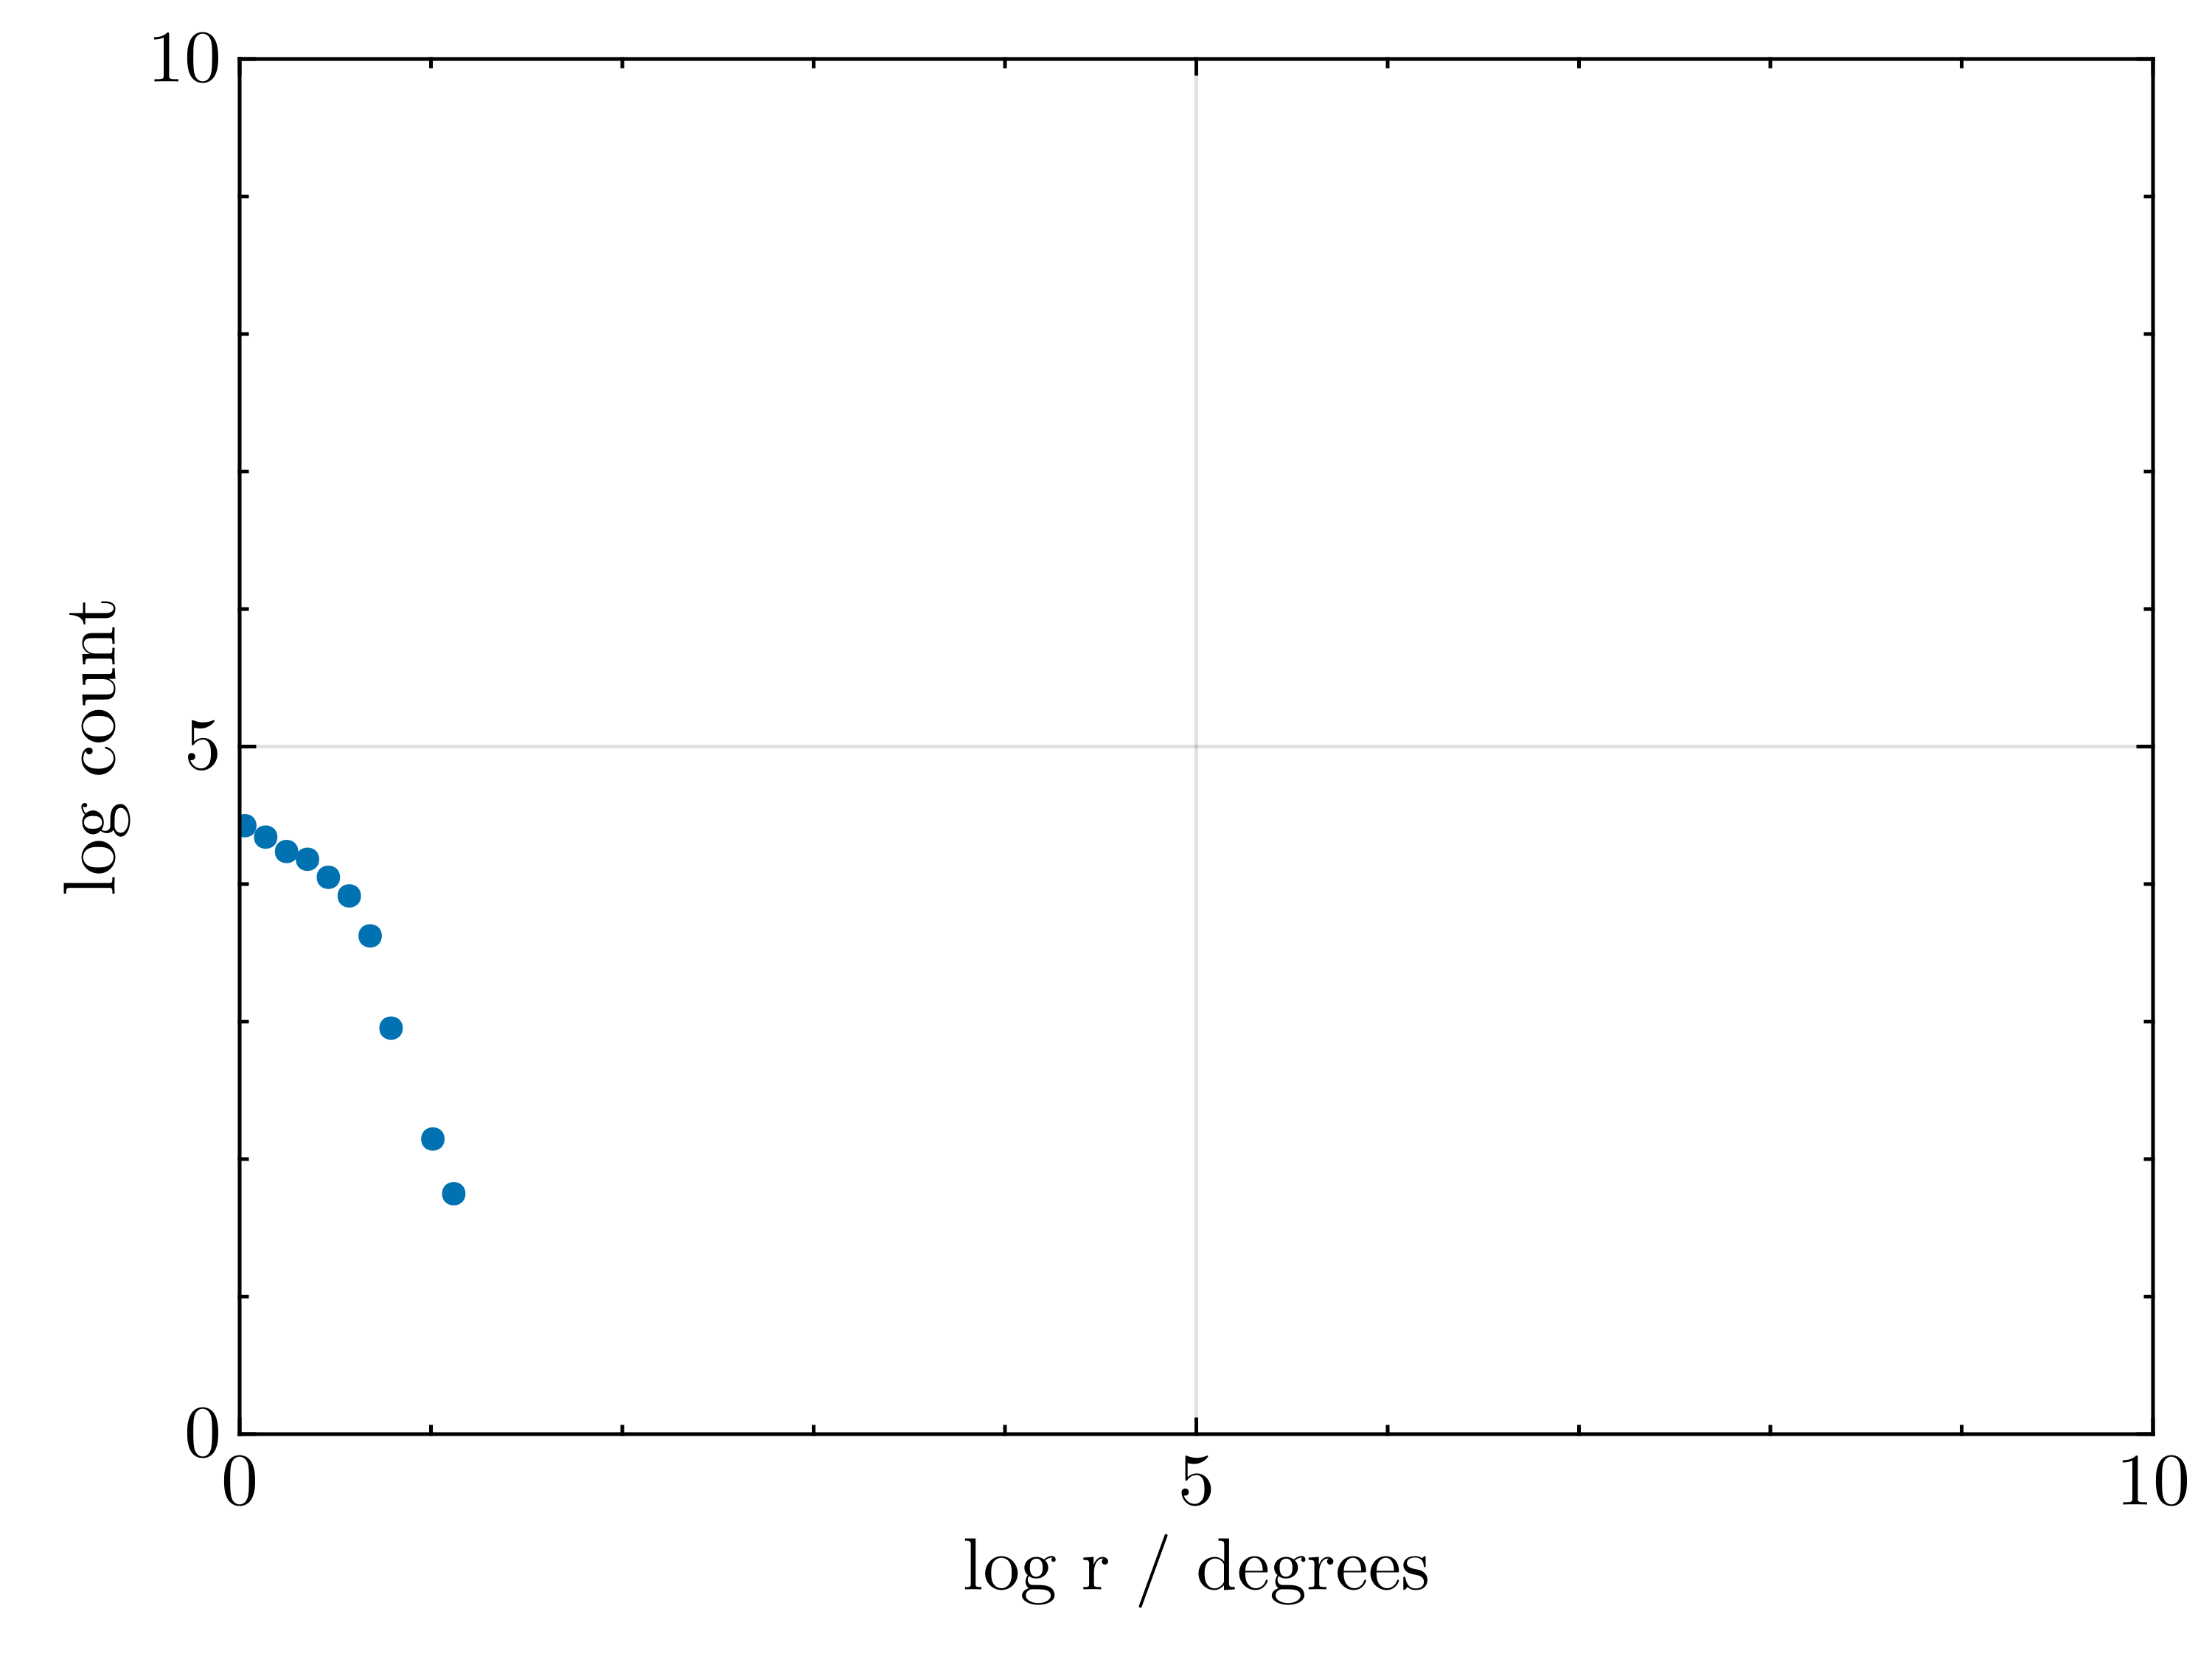

In [28]:

fig = Figure()

ax = Axis(fig[1,1],
    xlabel="log r / degrees", ylabel="log count")

bins3, ys3 = lguys.calc_histogram(log10.(r_ell), 29)

ys_un = ys3 * length(ys3)
ys_un_err = sqrt.(ys_un)
yerr = hcat(ys_un .- ys_un_err, ys_un .+ ys_un_err)
scatter!(lguys.midpoint(bins3), log10.(ys_un), yerr=log10.(yerr ./ ys_un), lw=1, label="members")

# bins3, ys3 = lguys.calc_histogram(log10.(members.r_ell * √(a*b)), 29)
# ys_un = ys3 * length(ys3)
# ys_un_err = sqrt.(ys_un)
# yerr = hcat(ys_un .- ys_un_err, ys_un .+ ys_un_err)
# scatter!(lguys.midpoint(bins3), log10.(ys_un), yerr=log10.(yerr ./ ys_un), lw=1, label="nonmembers")

fig